In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_sin=pd.read_csv("C:/Users/marti/OneDrive/Escritorio/jupyter/database/dataset_datos_faltantes_categoricos.csv")

In [4]:
df_sin.head()

,sexo,peso (kg),altura (cm)
0,femenino,60.0,160.0
1,masculino,69.0,170.0
2,masculino,73.0,167.0
3,NaN,81.0,170.0
4,masculino,80.0,170.0


In [6]:
df_sin.describe(include="all")

,sexo,peso (kg),altura (cm)
count,570,600.000000,600.000000
unique,2,NaN,NaN
top,masculino,NaN,NaN
freq,288,NaN,NaN
mean,NaN,67.423333,164.833333
std,NaN,6.708885,6.153481
min,NaN,51.000000,148.000000
25%,NaN,62.000000,160.000000
50%,NaN,67.000000,165.000000
75%,NaN,72.000000,170.000000


In [8]:
df_sin.isnull().sum()

sexo           30
peso (kg)       0
altura (cm)     0
dtype: int64

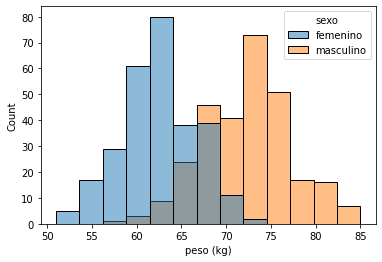

In [9]:
sns.histplot(data=df_sin, x='peso (kg)', hue='sexo');

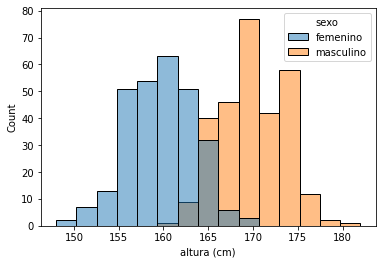

In [10]:
sns.histplot(data=df_sin, x='altura (cm)', hue='sexo');

In [11]:
df=df_sin

In [12]:
df= df_sin.dropna()

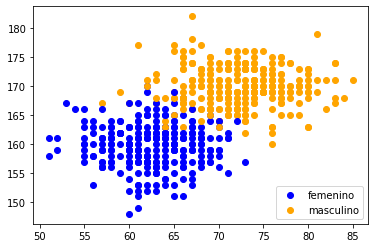

In [13]:
# Datos de ejemplo
x =df["peso (kg)"].tolist()
y= df["altura (cm)"].tolist()
categorias = df["sexo"].tolist()  # Categorías asociadas a cada punto

# Mapeo de categorías a colores
color_map = {'femenino': 'blue', 'masculino': 'orange'}

# Crear el gráfico
plt.figure()

# Graficar puntos con colores según su categoría
for i in (0,1):
    plt.scatter(x[i], y[i], color=color_map[categorias[i]],label=categorias[i])
for i in range(2,len(x)):
    plt.scatter(x[i], y[i], color=color_map[categorias[i]])

# Agregar leyenda
plt.legend(loc="lower right")
# Mostrar gráfico
plt.show()

In [14]:
# Mapeo de categorías a valores numéricos
mapeo = {'masculino': 0, 'femenino': 1}

# Reemplazar los valores en la columna 'Género' utilizando el mapeo
df['sexo_Numérico'] = df['sexo'].replace(mapeo);

C:\Users\marti\AppData\Local\Temp\ipykernel_34400\1101231944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sexo_Numérico'] = df['sexo'].replace(mapeo)


In [16]:
X = df.iloc[:, [1, 2]].values
y = df.iloc[:, 3].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
    # Predicción del conjunto de prueba
y_pred = classifier.predict(X_test)
    # Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
estimacion=classifier.score(X_test,y_test)
print(f"Efectividad de el modelo es {estimacion}")

Efectividad de el modelo es 0.9440559440559441


In [22]:
classifier.predict([[1,1]])

array([1], dtype=int64)

In [35]:
filas_con_nulos_en_A = df_sin.loc[df_sin['sexo'].isnull()]
n=filas_con_nulos_en_A.index
n

Int64Index([  3,  77,  78, 130, 145, 149, 152, 238, 252, 253, 276, 279, 285,
            305, 307, 371, 396, 400, 409, 448, 452, 481, 483, 501, 546, 547,
            558, 569, 570, 594],
           dtype='int64')

In [30]:
pr=filas_con_nulos_en_A.iloc[:, [1, 2]].values


In [31]:
pr

array([[ 81., 170.],
       [ 68., 166.],
       [ 62., 164.],
       [ 63., 153.],
       [ 57., 155.],
       [ 63., 163.],
       [ 73., 176.],
       [ 64., 167.],
       [ 71., 168.],
       [ 80., 163.],
       [ 69., 157.],
       [ 58., 167.],
       [ 72., 173.],
       [ 62., 159.],
       [ 66., 155.],
       [ 66., 162.],
       [ 58., 161.],
       [ 87., 171.],
       [ 68., 169.],
       [ 67., 161.],
       [ 58., 160.],
       [ 62., 155.],
       [ 63., 153.],
       [ 70., 166.],
       [ 60., 162.],
       [ 65., 159.],
       [ 71., 169.],
       [ 70., 172.],
       [ 63., 165.],
       [ 63., 164.]])

In [36]:
s=classifier.predict(pr)
s

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [43]:
for i in range(0,len(n)):
    if(s[i]==0):
        df_sin["sexo"][n[i]]="femenino"
    else:
        df_sin["sexo"][n[i]]="masculino" 

C:\Users\marti\AppData\Local\Temp\ipykernel_34400\3028339092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin["sexo"][n[i]]="femenino"
C:\Users\marti\AppData\Local\Temp\ipykernel_34400\3028339092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin["sexo"][n[i]]="masculino"


''

In [42]:
df_sin.describe(include="all")

,sexo,peso (kg),altura (cm)
count,600,600.000000,600.000000
unique,2,NaN,NaN
top,masculino,NaN,NaN
freq,306,NaN,NaN
mean,NaN,67.423333,164.833333
std,NaN,6.708885,6.153481
min,NaN,51.000000,148.000000
25%,NaN,62.000000,160.000000
50%,NaN,67.000000,165.000000
75%,NaN,72.000000,170.000000
